# SVHN - Prediction on custom images
This notebook runs the sequence detection models on custom images. To use it, create a folder **../inputs/custom**. Copy your images there and run this notebook to the end. It picks up all images in custom folder and tries to generate predictions on them.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from scipy import misc
from keras.utils import np_utils
import graphics

image_size = (54,128)
max_digits = 7

%matplotlib inline

C:\Users\ansh41\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [52]:
import os

def loadImages(path):
    Ximg = []
    for filename in os.listdir(path):
        if filename.endswith('png') or filename.endswith('jpg'):
            rawimage = misc.imread(path+filename)
            img = misc.imresize(rawimage, size=image_size, interp='bilinear')
            Ximg.append(img)
    return np.array(Ximg)

def standardize(img):
    s = img - np.mean(img, axis=(2,0,1), keepdims=True)
    s /= np.std(s, axis=(2,0,1), keepdims=True)
    return s

In [3]:
# load models
model_yaml = open('../checkpoints/model.yaml','r')
model = keras.models.model_from_yaml(model_yaml.read())
model_yaml.close()
model.load_weights('../checkpoints/model.hdf5')

vision = model.layers[1]
counter = model.layers[3]
detector = model.layers[4]

C:\Users\ansh41\Anaconda3\lib\site-packages\keras\engine\topology.py:1271: UserWarning: Update your `InputLayer` call to the Keras 2 API: `InputLayer(batch_input_shape=(None, 54,..., name="train_input_img", sparse=False, dtype="float32")`
  return cls(**config)
C:\Users\ansh41\Anaconda3\lib\site-packages\keras\engine\topology.py:1271: UserWarning: Update your `InputLayer` call to the Keras 2 API: `InputLayer(batch_input_shape=(None, 54,..., name="input_1", sparse=False, dtype="float32")`
  return cls(**config)
C:\Users\ansh41\Anaconda3\lib\site-packages\keras\engine\topology.py:1271: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(axis=3, beta_regularizer=None, epsilon=0.001, gamma_regularizer=None, momentum=0.99, name="batchnormalization_1", trainable=True)`
  return cls(**config)
C:\Users\ansh41\Anaconda3\lib\site-packages\keras\engine\topology.py:1271: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="tanh", act

C:\Users\ansh41\Anaconda3\lib\site-packages\keras\engine\topology.py:1271: UserWarning: Update your `InputLayer` call to the Keras 2 API: `InputLayer(batch_input_shape=(None, 7), name="train_input_idx", sparse=False, dtype="float32")`
  return cls(**config)
C:\Users\ansh41\Anaconda3\lib\site-packages\keras\engine\topology.py:1271: UserWarning: Update your `InputLayer` call to the Keras 2 API: `InputLayer(batch_input_shape=(None, 102..., name="input_2", sparse=False, dtype="float32")`
  return cls(**config)
C:\Users\ansh41\Anaconda3\lib\site-packages\keras\engine\topology.py:1271: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", activity_regularizer=None, input_dim=1024, name="dense_3", trainable=True, units=256, kernel_initializer="glorot_uniform", kernel_regularizer=None, bias_regularizer=None, kernel_constraint=None, bias_constraint=None, use_bias=True)`
  return cls(**config)
C:\Users\ansh41\Anaconda3\lib\site-packages\keras\engine\topology.py:1271

In [53]:
Ximg = loadImages('../inputs/custom/')
Xs = np.array([standardize(x) for x in Ximg])

h = vision.predict(Xs)
ycount = counter.predict(h)
ycount = np.argmax(ycount, axis=1)

ylabel = []
for i in range(len(ycount)):
    # generate range for each count
    indices = np.arange(ycount[i])
    # one hot encoding for each index
    indices = np_utils.to_categorical(indices, max_digits)
    # tile h to match shape of indices matrix
    hs = np.tile(h[i], (ycount[i],1))
    
    # predict labels for the sample
    sample_seq = detector.predict([hs, indices])
    sample_seq = np.argmax(sample_seq,1)
    ylabel.append(sample_seq)

C:\Users\ansh41\Anaconda3\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
C:\Users\ansh41\Anaconda3\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


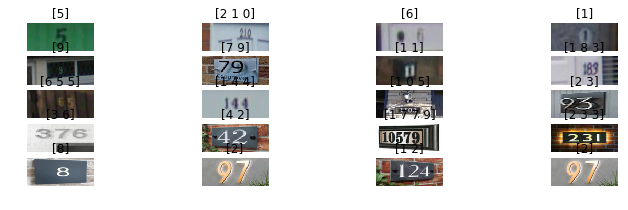

In [54]:
plt.figure(figsize=(12,3))
for i in range(len(Ximg)):
    plt.subplot(5,4,i+1)
    plt.imshow(Ximg[i])
    plt.axis('off')
    plt.title("{}".format(ylabel[i]))

32 convolutions in layer 4


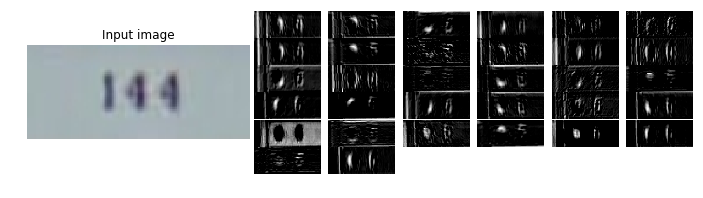

In [8]:
graphics.showCNNConv(vision, 4, Ximg[8], standardize(Ximg[2]))